In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Flatten, Conv2D, MaxPool2D,Dropout,Input
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix
#import datetime, os
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [ ]:
train_path = '/kaggle/input/tumour-brain/Training'
test_path = '/kaggle/input/tumour-brain/Testing'

In [ ]:
train_datagen = ImageDataGenerator(validation_split=0.2,rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
train_batches = train_datagen.flow_from_directory(
        train_path,
        target_size=(64, 64),
        batch_size=32,
        subset='training',
        class_mode='categorical')

validation_batches = train_datagen.flow_from_directory(
        train_path,
        target_size=(64, 64),
        batch_size=32,
        subset='validation',
        class_mode='categorical')
test_batches = test_datagen.flow_from_directory(
         test_path,
         target_size=(64, 64),
        batch_size=32,
        class_mode='categorical')

Found 2297 images belonging to 4 classes.
Found 573 images belonging to 4 classes.
Found 394 images belonging to 4 classes.


In [ ]:
model = Sequential()
model.add(Conv2D(32, 3, activation='relu' , input_shape=(64,64,3)))
model.add(MaxPool2D())
model.add(Dropout(0.25))
model.add(Conv2D(64, 3, activation='relu'))
model.add(MaxPool2D())
model.add(Flatten())
#hidden layer 1
model.add(Dense(128 , activation = 'relu'))
#hidden layer 2
model.add(Dense(64 , activation = 'relu'))
#hidden layer 3
model.add(Dense(32 , activation = 'relu'))
model.add(Dropout(0.25))
# output layer
model.add(Dense(4 , activation = 'softmax'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 62, 62, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 31, 31, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 31, 31, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 29, 29, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 12544)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       1,605,760 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 4)                   │             132 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,635,620 (6.24 MB)

 Trainable params: 1,635,620 (6.24 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# model compiling
model.compile('adam' , loss = 'categorical_crossentropy' , metrics = ['accuracy'])
# training model
history= model.fit(x=train_batches,
    validation_data=validation_batches,
    epochs=7,
    verbose=2,
)

Epoch 1/7


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


72/72 - 22s - 303ms/step - accuracy: 0.5220 - loss: 1.0624 - val_accuracy: 0.4538 - val_loss: 1.1211
Epoch 2/7
72/72 - 6s - 80ms/step - accuracy: 0.6739 - loss: 0.7565 - val_accuracy: 0.4747 - val_loss: 1.1748
Epoch 3/7
72/72 - 6s - 80ms/step - accuracy: 0.7640 - loss: 0.5816 - val_accuracy: 0.4939 - val_loss: 1.0739
Epoch 4/7
72/72 - 6s - 78ms/step - accuracy: 0.8180 - loss: 0.4481 - val_accuracy: 0.6562 - val_loss: 0.9318
Epoch 5/7
72/72 - 6s - 79ms/step - accuracy: 0.8629 - loss: 0.3557 - val_accuracy: 0.6021 - val_loss: 1.0460
Epoch 6/7
72/72 - 6s - 79ms/step - accuracy: 0.9034 - loss: 0.2530 - val_accuracy: 0.6091 - val_loss: 1.3572
Epoch 7/7
72/72 - 6s - 80ms/step - accuracy: 0.9173 - loss: 0.2149 - val_accuracy: 0.6702 - val_loss: 1.2283


In [ ]:
predictions = model.predict(x=test_batches, verbose=0)
predictions=np.round(predictions)

In [ ]:
print(model.evaluate(x=test_batches))

13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 110ms/step - accuracy: 0.6195 - loss: 2.7900
[2.6323790550231934, 0.6472080945968628]


In [ ]:
cm = confusion_matrix(y_true=test_batches.classes,y_pred=np.argmax(predictions,axis=1))

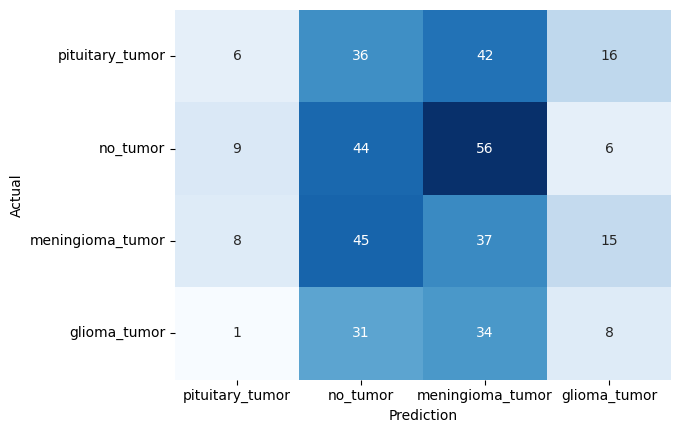

In [ ]:
ax = sns.heatmap(cm, annot=True, xticklabels=["pituitary_tumor",'no_tumor',"meningioma_tumor","glioma_tumor"], yticklabels=["pituitary_tumor",'no_tumor',"meningioma_tumor","glioma_tumor"],
                cbar=False,cmap='Blues')
ax.set_xlabel('Prediction')
ax.set_ylabel('Actual')
plt.show()

In [ ]:
from sklearn.metrics import classification_report

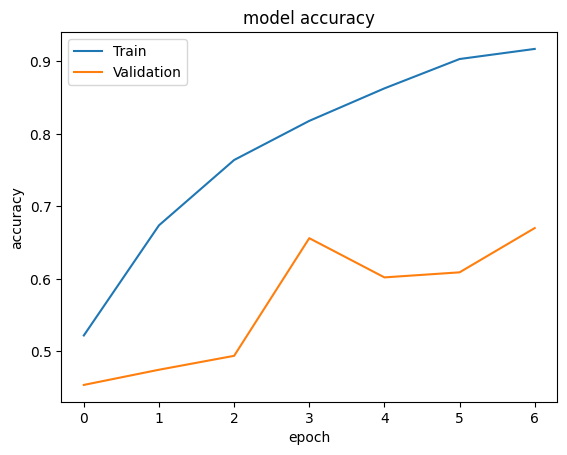

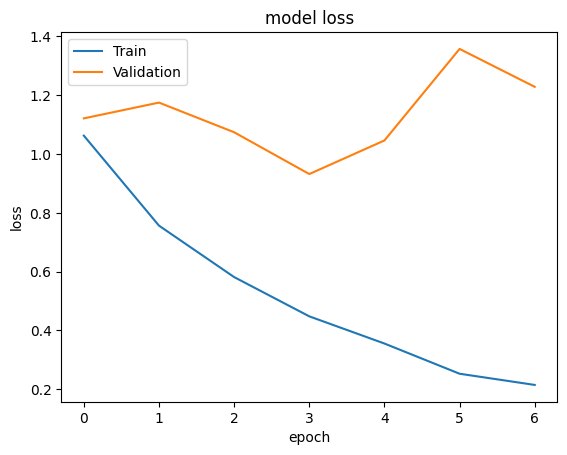

In [ ]:
import matplotlib.pyplot as plt

# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
y_predicted = model.predict(test_batches)
y_predicted[0]

13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 65ms/step


array([3.5115777e-04, 6.3410842e-01, 3.6455873e-01, 9.8170352e-04],
      dtype=float32)

In [ ]:
import numpy as np
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model
# Load the image you want to predict
img_path = '/kaggle/input/tumour-brain/Testing/meningioma_tumor/image(1).jpg'
img = image.load_img(img_path, target_size=(64, 64))  # Adjust target_size according to your model input size
# Convert the image to a numpy array
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
img_array /= 255.
prediction = model.predict(img_array)
class_labels = ['glicoma', 'mening', 'no tumour', 'pitutary']  # list of your class labels
predicted_class_indices = np.argmax(prediction, axis=1)
predicted_classes = [class_labels[idx] for idx in predicted_class_indices]
print("Predicted classes:", predicted_classes)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 568ms/step
Predicted classes: ['mening']
